In [106]:
DATA_PATH_TRAIN = '../artifacts/data_transformation/train.pkl'
DATA_PATH_TEST = '../artifacts/data_transformation/test.pkl'

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [108]:
train_df = pd.read_pickle(DATA_PATH_TRAIN)
test_df = pd.read_pickle(DATA_PATH_TEST)

In [109]:
train_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
10919,1.601390,0,0,1.342407,4,0.711712,1,1,0.684131,1
2339,0.004875,1,1,-1.232140,5,1.130739,1,0,0.724656,0
12854,0.801526,0,0,0.781999,6,-1.225847,1,0,-0.552422,1
125,-2.261068,0,1,0.293517,9,1.219947,1,0,0.176937,1
15084,-1.209341,1,1,1.209641,3,0.557034,1,0,0.841260,1
...,...,...,...,...,...,...,...,...,...,...
13123,1.000058,0,0,0.000036,9,0.883849,1,1,-0.720424,1
3264,0.905045,0,1,-0.373958,5,1.358918,2,0,1.414408,0
9845,-0.626278,2,0,-0.087897,9,-1.225847,2,1,0.846153,0
10799,-1.441435,0,1,0.506902,1,-0.153202,1,0,-0.723301,1


In [110]:
test_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
10878,0.154973,1,1,-0.604834,5,0.830540,1,0,-0.317981,1
13564,0.095043,1,1,0.378345,1,0.417238,1,0,-1.161483,1
3959,0.129037,1,1,0.960993,7,0.635708,3,1,-0.273559,1
12402,1.064093,0,1,0.193597,6,0.450586,1,0,0.461231,1
14151,-0.286023,1,0,-0.448713,6,0.770506,1,0,-0.616487,1
...,...,...,...,...,...,...,...,...,...,...
6713,-0.667665,0,0,0.674932,0,-1.225847,3,1,0.547115,1
2849,-1.588528,0,1,0.198164,9,-1.225847,1,0,-1.356616,0
2618,-1.578181,0,0,-0.850726,1,-1.225847,2,0,0.620879,0
14715,1.241329,1,0,1.417043,6,0.402000,1,0,0.415320,1


In [111]:
df = train_df.copy()

In [112]:
df['Exited'].value_counts()

Exited
0    6373
1    6367
Name: count, dtype: int64

In [113]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
10919,1.601390,0,0,1.342407,4,0.711712,1,1,0.684131,1
2339,0.004875,1,1,-1.232140,5,1.130739,1,0,0.724656,0
12854,0.801526,0,0,0.781999,6,-1.225847,1,0,-0.552422,1
125,-2.261068,0,1,0.293517,9,1.219947,1,0,0.176937,1
15084,-1.209341,1,1,1.209641,3,0.557034,1,0,0.841260,1


### 1. Splitting Data into Features and Target Variable

In [114]:
x_resampled = df.drop(columns=['Exited'])
y_resampled = df['Exited']

### 2. Splitting Oversampled Data for Training and Testing

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [116]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10192, 9), (10192,), (2548, 9), (2548,))

<Axes: xlabel='Age', ylabel='Balance'>

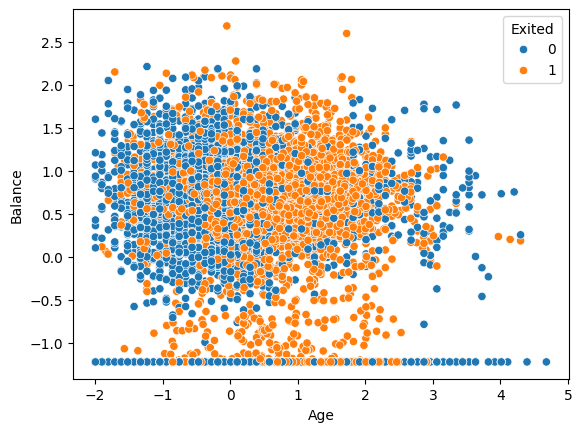

In [117]:
sns.scatterplot(x=x_train['Age'], y=x_train['Balance'], hue=y_train)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

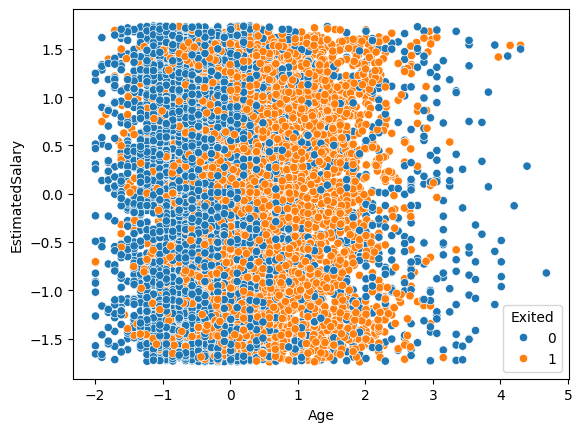

In [130]:
sns.scatterplot(x=x_train['Age'], y=x_train['EstimatedSalary'], hue=y_train)

____________

# Train models

In [118]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred_lr = logistic_regression.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred_lr)
accuracy1

0.7229199372056515

In [119]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_svm)
accuracy2

0.728414442700157

In [120]:
rf_Model = RandomForestClassifier()
rf_Model.fit(x_train, y_train)
y_pred_rf = rf_Model.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred_rf)
accuracy3

0.8818681318681318

In [121]:
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

precision, recall, f1

(0.74, 0.7082695252679939, 0.7237871674491394)

### Initialize MLflow-dagshub

In [122]:
import dagshub
dagshub.init(repo_owner='amrahmed95', repo_name='Bank-Chrun-Prediction', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Initialized MLflow to track repo "amrahmed95/Bank-Chrun-Prediction"

Repository amrahmed95/Bank-Chrun-Prediction initialized!

In [123]:
def evaluate_model(true, predict):
    accuracy = accuracy_score(true, predict)
    precision = precision_score(true, predict)
    recall = recall_score(true, predict)
    f1 = f1_score(true, predict)
    return accuracy, precision, recall, f1

In [124]:
models = {
    "Logestic Regression": LogisticRegression(),
    "SVM": SVC(kernel='poly'),
    "Random Forest": RandomForestClassifier()
}

model_list = []
train_accuracy = []
train_precision = []
train_recall = []
train_f1_score = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy , model_train_precision, model_train_recall, model_train_f1_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy , model_test_precision, model_test_recall, model_test_f1_score = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    train_accuracy.append(model_train_accuracy)
    train_precision.append(model_train_precision)
    train_recall.append(model_train_recall)
    train_f1_score.append(model_train_f1_score)
    test_accuracy.append(model_test_accuracy)
    test_precision.append(model_test_precision)
    test_recall.append(model_test_recall)
    test_f1_score.append(model_test_f1_score)
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1-Score: {:.4f}".format(model_train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1-Score: {:.4f}".format(model_train_f1_score))
    
    print('='*35)
    print('\n')


Logestic Regression
Model performance for Training set
- Accuracy Score: 0.7263
- Precision: 0.7220
- Recall: 0.7297
- F1-Score: 0.7258
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7229
- Precision: 0.7400
- Recall: 0.7083
- F1-Score: 0.7258


SVM
Model performance for Training set
- Accuracy Score: 0.7461
- Precision: 0.7036
- Recall: 0.8443
- F1-Score: 0.7676
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7284
- Precision: 0.7009
- Recall: 0.8201
- F1-Score: 0.7676


Random Forest
Model performance for Training set
- Accuracy Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8779
- Precision: 0.8836
- Recall: 0.8775
- F1-Score: 1.0000




In [125]:
df = pd.DataFrame({
    'Model': model_list,
    'Train Accuracy': train_accuracy,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1_score,
    'Test Accuracy': test_accuracy,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1_score
})

# Sort the DataFrame by Test F1-Score in descending order
df = df.sort_values(by=['Test Accuracy'], ascending=False)

# Print the DataFrame
print(df)

                 Model  Train Accuracy  Train Precision  Train Recall  \
2        Random Forest        1.000000         1.000000      1.000000   
1                  SVM        0.746075         0.703606      0.844300   
0  Logestic Regression        0.726256         0.721994      0.729698   

   Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  
2        1.000000       0.877943        0.883577     0.877489       0.880522  
1        0.767559       0.728414        0.700916     0.820061       0.755822  
0        0.725825       0.722920        0.740000     0.708270       0.723787  


### Hyperparameter Tuning with Randomized Search: Random Forest.

In [126]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['sqrt', 'log2', None]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.model_selection import RandomizedSearchCV

#--- WRITE YOUR CODE FOR TASK 5 ---

# Assuming you have defined your parameter grid as param_gri
rf_RandomGrid = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid,
                                   cv=5,
                                   verbose=0,
                                   n_jobs=10,
                                   random_state=42)

# Fit the RandomizedSearchCV to the training data

rf_RandomGrid.fit(x_train, y_train)


# Make predictions on the test data
y_pred_rf = rf_RandomGrid.predict(x_test)

# Calculate evaluation metrics
accuracy4 = accuracy_score(y_test, y_pred_rf)
precision4 = precision_score(y_test, y_pred_rf)
recall4 = recall_score(y_test, y_pred_rf)
f1_4 = f1_score(y_test, y_pred_rf)

# accuracy4, precision4, recall4, f1_4
accuracy4, precision4, recall4, f1_4

(0.8865777080062794, 0.8890589135424637, 0.889739663093415, 0.8893991580558744)

### Feature Importance Analysis: Random Forest Model.

In [127]:
best_rf_model = rf_RandomGrid.best_estimator_

feature_importances = best_rf_model.feature_importances_

feature_names = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [128]:
feature_importance_df

,Feature,Importance
3,Age,0.307028
6,NumOfProducts,0.153374
5,Balance,0.124271
8,EstimatedSalary,0.107630
0,CreditScore,0.102781
7,IsActiveMember,0.067476
4,Tenure,0.065096
1,Geography,0.041043
2,Gender,0.031301


In [ ]:
# Export model as pkl file

with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

-------

In [1]:
import os

In [2]:
%pwd

'f:\\End-to-End-DS-Projects\\Bank Churn Prediction\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'f:\\End-to-End-DS-Projects\\Bank Churn Prediction'

### Update the entity

In [5]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class ModelTrainerConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_name: str
    n_estimators : list
    max_features : list
    max_depth : list
    min_samples_split : list
    min_samples_leaf : list
    bootstrap : list
    target_column: str

### Update the configuration manager

In [6]:
from src.BankChurn.constants import *
from src.BankChurn.utils.common import read_yaml, create_directories, save_json

In [7]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_model_trainer_config(self) -> ModelTrainerConfig:
        config = self.config.model_trainer
        params = self.params.RandomForest
        schema =  self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_trainer_config = ModelTrainerConfig(
            root_dir=config.root_dir,
            train_data_path = config.train_data_path,
            test_data_path = config.test_data_path,
            model_name = config.model_name,
            n_estimators = params.n_estimators,
            max_features = params.max_features,        
            max_depth = params.max_depth,
            min_samples_split = params.min_samples_split,
            min_samples_leaf = params.min_samples_leaf,
            bootstrap = params.bootstrap,
            target_column = schema.name
            
        )

        return model_trainer_config

### Update the components

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from src.BankChurn import logger
import joblib
from src.BankChurn import evaluate_models


In [9]:
class ModelTrainer:
    def __init__(self, config: ModelTrainerConfig):
        logger.info("Initialize Model Training and Evaluation")
        self.config = config      
     
    
    def Initialize_model_trainer(self):
        config = self.config
        logger.info("Loading data")
        data = pd.read_pickle(self.config.train_data_path)
        
        logger.info("Start Splitting input data")
        df = data.copy()
        x_resampled = df.drop(columns=['Exited'])
        y_resampled = df['Exited']
        x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
        
        logger.info("Start Modelling and Evaluating")
        
        models={
            "logistic_regression": LogisticRegression(),
            "svc": SVC(),
            "random_forest": RandomForestClassifier(),
        }
        
        params = {
            "logistic_regression": {},
            "svc": {},
            "random_forest": {
                'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
                'max_features' : ['sqrt', 'log2', None],
                'max_depth' : [None, 10, 20, 30],
                'min_samples_split' : [2, 5, 10],
                'min_samples_leaf' : [1, 2, 4],
                'bootstrap' : [True, False]
            }
        }

        model_report: dict = evaluate_models(
                X_train=x_train, y_train=y_train, X_test=x_test, y_test=y_test,
                models=models, param=params
            )
        #best_model_score = max(model_report.values())
        best_model_score = max(model_report.values(), key=lambda x: x['test_model_accuracy'])
        best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]
        best_model = models[best_model_name]

        if best_model_score['test_model_accuracy'] < 0.6:
            raise Exception("No best model Found")
        
        logger.info(f"Best found model on both training and testing dataset")

        joblib.dump(best_model, os.path.join(self.config.root_dir, self.config.model_name))
        
        # Export the best model as pickle file in artifacts/model_trainer
        
       
        
        
                
        # logger.info("Start Predicting Best Model")
        # predicted = best_model.predict(x_test)
        
        # accuracy = accuracy_score(y_test, predicted)
        # precision = precision_score(y_test, predicted)
        # recall = recall_score(y_test, predicted)
        # f1 = f1_score(y_test, predicted)
        
        # return best_model_name, accuracy, precision, recall, f1
    
   
   

### Update the pipeline

In [10]:
try:
    config = ConfigurationManager()
    model_trainer_config = config.get_model_trainer_config()
    model_trainer_config = ModelTrainer(config=model_trainer_config)
    model_trainer_config.Initialize_model_trainer()
except Exception as e:
    raise e

[2024-06-11 01:04:05,830: 31 - Bank Churn Project Logger: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-06-11 01:04:05,943: 31 - Bank Churn Project Logger: INFO: common: yaml file: params.yaml loaded successfully]
[2024-06-11 01:04:05,962: 31 - Bank Churn Project Logger: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-06-11 01:04:05,965: 51 - Bank Churn Project Logger: INFO: common: created directory at: artifacts]
[2024-06-11 01:04:05,968: 51 - Bank Churn Project Logger: INFO: common: created directory at: artifacts/model_trainer]
[2024-06-11 01:04:05,969: 3 - Bank Churn Project Logger: INFO: 133112008: Initialize Model Training and Evaluation]
[2024-06-11 01:04:05,971: 9 - Bank Churn Project Logger: INFO: 133112008: Loading data]
[2024-06-11 01:04:06,035: 12 - Bank Churn Project Logger: INFO: 133112008: Start Splitting input data]
[2024-06-11 01:04:06,084: 18 - Bank Churn Project Logger: INFO: 133112008: Start Modelling and Evaluating]


f:\End-to-End-DS-Projects\Bank Churn Prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
f:\End-to-End-DS-Projects\Bank Churn Prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[2024-06-11 01:05:12,331: 51 - Bank Churn Project Logger: INFO: 133112008: Best found model on both training and testing dataset]
